# Zomato Area Cuisines Prefference Clustering KModes
## By : Nr
### Data : Zomato api request based on coordinate [foodies index(popularity), nightlife_index,top_cuisines rank]

There is top cuisines rank in zomato geocode api req. from 1 to 5 of each coordinate. Here, I want to find location similarity on cuisines perspective based on zomato user judgement (top cuisines rank 1~5).

I choose KModes clustering, based on their strength point for categorical dataset clustering.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv("./zomato.csv") #load zomato data

In [33]:
df

,Unnamed: 0,ID,lokasi,popularity,nightlife_index,restaurant count,top_cuisines1,top_cuisines2,top_cuisines3,top_cuisines4,top_cuisines5
0,0,1,Sunter,5.00,4.67,9,Indonesian,Coffee,Chinese,Desserts,Beverages
1,1,2,Tanjung Priok,2.13,0.55,9,Indonesian,Seafood,Coffee,Chinese,Bakmi
2,2,3,Tanjung Priok,2.13,0.55,9,Indonesian,Seafood,Coffee,Chinese,Bakmi
3,3,4,Tanjung Priok,2.13,0.55,9,Indonesian,Seafood,Coffee,Chinese,Bakmi
4,4,5,Cibubur,2.61,0.00,9,Indonesian,Coffee,Western,Desserts,Bakmi
...,...,...,...,...,...,...,...,...,...,...,...
510,510,511,Rawamangun,3.96,0.66,9,Indonesian,Coffee,Chinese,Desserts,Jawa
511,511,512,Pulo Gadung,3.96,0.66,9,Indonesian,Coffee,Chinese,Desserts,Jawa
512,512,513,Pulo Gadung,5.00,4.67,9,Indonesian,Coffee,Chinese,Desserts,Beverages
513,513,514,Kelapa Gading,5.00,4.67,9,Indonesian,Coffee,Chinese,Desserts,Beverages


In [17]:
df2=df.drop(columns=['ID','Unnamed: 0','restaurant count','lokasi','popularity','nightlife_index']) #drop unecessary column from clustering dataset

In [18]:
#Encode all category label
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df2=df2.apply(le.fit_transform)
df2.head()

,top_cuisines1,top_cuisines2,top_cuisines3,top_cuisines4,top_cuisines5
0,3,3,6,8,3
1,3,7,7,6,1
2,3,7,7,6,1
3,3,7,7,6,1
4,3,3,15,8,1


In [19]:
from kmodes.kmodes import KModes

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1557.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9, cost: 1371.0
Run 1, iteration: 2/100, moves: 0, cost: 1371.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 27, cost: 1224.0
Run 1, iteration: 2/100, moves: 0, cost: 1224.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 23, cost: 1155.0
Run 1, iteration: 2/100, moves: 0, cost: 1155.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 57, cost: 1063.0
Run 1, iteration: 2/100, moves: 8, cost: 1063.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 57, cost: 999.0
Run 1, iteration: 2/100, moves: 8, co

Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 15, cost: 183.0
Run 1, iteration: 2/100, moves: 3, cost: 183.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 15, cost: 181.0
Run 1, iteration: 2/100, moves: 3, cost: 181.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 15, cost: 177.0
Run 1, iteration: 2/100, moves: 3, cost: 177.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 15, cost: 172.0
Run 1, iteration: 2/100, moves: 3, cost: 172.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 15, cost: 168.0
Run 1, iteration: 2/100, moves: 3, cost: 168.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 15, cost: 160.0
Run 1, iteration: 2/100, m

Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0


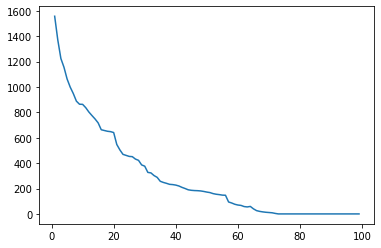

In [30]:
cost=[]
k=100 #max number of cluster (observed)
for num_clusters in list(range(1,k)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df2)
    cost.append(kmode.cost_)

y = np.array([i for i in range(1,k,1)])
plt.plot(y,cost)

In [31]:
km_cao = KModes(n_clusters=75, init = "Cao", n_init = 1, verbose=1) #I choose k=75 based on cost curve trend (flattern)
fitClusters_cao = km_cao.fit_predict(df2)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0


In [32]:
fitClusters_cao

array([59, 47, 47, 47, 25, 25, 25, 13, 13, 13, 20, 54, 54,  4,  4, 71, 24,
       24,  9, 14, 10, 69, 10, 69,  3, 59,  3, 59,  3, 59,  3, 59, 15, 15,
       15, 15, 25, 25, 25, 13, 13, 13, 13, 20,  4,  4,  4, 71, 24,  9, 24,
        9, 14, 10, 14, 10, 69, 30, 59, 30, 59,  3, 59,  3, 59, 59, 15, 15,
       15, 66, 66, 41, 41, 41, 41, 41,  4,  4, 71,  5,  9, 14, 10, 14, 10,
       26, 10, 69, 10, 69, 30, 59, 30, 59,  3, 59, 15, 15, 15, 15, 41, 41,
       46, 27,  4, 27, 71, 27,  5, 10,  5, 10, 14, 10, 14, 30, 26, 30, 59,
       30, 59, 30, 59, 22, 59, 59, 15, 15, 15,  1, 70,  4, 70, 71, 40,  5,
       40, 14, 40, 26, 10, 26, 30, 26, 30, 26, 30, 26, 22, 59, 22, 59, 15,
       15, 15, 15,  1, 70, 70, 70, 71, 40,  5, 40, 62, 40, 62, 30, 26, 30,
       26, 30, 26, 22, 26, 22, 26, 22, 26, 59, 15, 15, 15, 70, 44,  1,  1,
        1, 70, 70, 40, 40, 62, 40, 26, 12, 26, 12, 26, 22, 26, 22, 26, 22,
       26, 22, 45, 15, 15, 15, 15, 44, 44, 44, 18, 18, 70, 49, 49, 49,  0,
        0, 12, 62, 22, 45

In [36]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df, clustersDf], axis = 1).reset_index()#re-assemble clustering result into main data set

In [38]:
combinedDf.to_csv('clustering-zomato.csv') #output file with clustering result, ready to used in spatial observation (GIS)

In [62]:
y = combinedDf[combinedDf['cluster_predicted'].isin([42,72,33])].drop(columns=['index','Unnamed: 0']).sort_values(by=['cluster_predicted'])

In [63]:
y

,ID,lokasi,popularity,nightlife_index,restaurant count,top_cuisines1,top_cuisines2,top_cuisines3,top_cuisines4,top_cuisines5,cluster_predicted
304,305,Melawai,4.95,4.62,9,Indonesian,Coffee,Western,Beverages,Japanese,33
305,306,Blok M,5.00,5.00,9,Indonesian,Coffee,Western,Beverages,Japanese,33
328,329,Dharmawangsa,4.95,4.62,9,Indonesian,Coffee,Western,Beverages,Japanese,33
329,330,Senopati,5.00,5.00,9,Indonesian,Coffee,Western,Beverages,Japanese,33
327,328,Fatmawati,5.00,4.92,9,Coffee,Indonesian,Western,Beverages,Desserts,42
350,351,Kemang,5.00,4.92,9,Coffee,Indonesian,Western,Beverages,Desserts,42
351,352,Kemang,5.00,4.92,9,Coffee,Indonesian,Western,Beverages,Desserts,42
352,353,Kemang,5.00,4.92,9,Coffee,Indonesian,Western,Beverages,Desserts,42
353,354,Senopati,4.22,3.40,9,Indonesian,Coffee,Beverages,Cafe,Desserts,72
372,373,Kemang,4.22,3.40,9,Indonesian,Coffee,Beverages,Cafe,Desserts,72


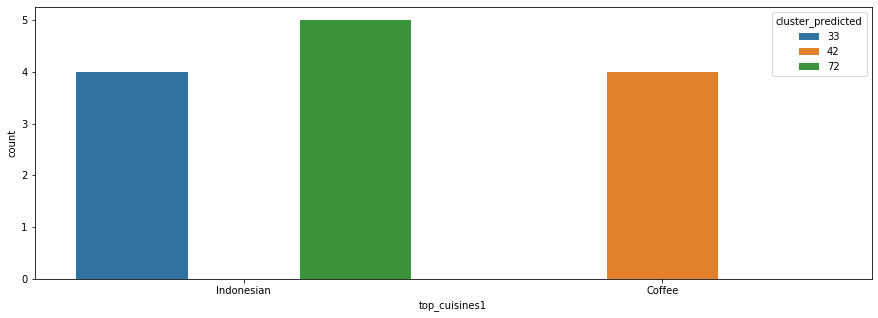

In [68]:
plt.subplots(figsize = (15,5))
sns.countplot(x=y['top_cuisines1'],order=y['top_cuisines1'].value_counts().index,hue=y['cluster_predicted'])
plt.show()

In [115]:
a_df=combinedDf.drop_duplicates(['cluster_predicted']).sort_values(by=['cluster_predicted']).iloc[:,[7,8,9,10,11,12]].reset_index(drop=True)

In [116]:
pd.options.display.max_rows = 100
a_df

,top_cuisines1,top_cuisines2,top_cuisines3,top_cuisines4,top_cuisines5,cluster_predicted
0,Indonesian,Chinese,Coffee,Bakmi,Bakery,0
1,Indonesian,Coffee,Beverages,Desserts,Jawa,1
2,Indonesian,Coffee,Desserts,Beverages,Jawa,2
3,Bakery,Coffee,Desserts,Indonesian,Tea,3
4,Coffee,Cafe,Indonesian,Tea,Snacks,4
5,Indonesian,Coffee,Jawa,Bakery,Beverages,5
6,Indonesian,Coffee,Beverages,Japanese,Tea,6
7,Indonesian,Coffee,Desserts,Beverages,Western,7
8,Indonesian,Beverages,Coffee,Desserts,Fast Food,8
9,Indonesian,Coffee,Fast Food,Jawa,Bakmi,9


In [117]:
a_df.to_csv('zomato_cluster_legend.csv')#output as legend/explanation of each cluster